# Reconcile annotations for the RBC-GEM

## Setup
### Import packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from rbc_gem_utils import (
    COBRA_CONFIGURATION,
    ROOT_PATH,
    ANNOTATION_PATH,
    MODEL_PATH,
    INTERIM_PATH,
    read_rbc_model,
    compare_tables,
    visualize_comparison,
)

### Define configuration
#### COBRA Configuration

In [2]:
COBRA_CONFIGURATION

Attribute,Description,Value
solver,Mathematical optimization solver,gurobi
tolerance,"General solver tolerance (feasibility, integrality, etc.)",1e-07
lower_bound,Default reaction lower bound,-1000.0
upper_bound,Default reaction upper bound,1000.0
processes,Number of parallel processes,15
cache_directory,Path for the model cache,/Users/zhaiman/Library/Caches/cobrapy
max_cache_size,Maximum cache size in bytes,104857600
cache_expiration,Model cache expiration time in seconds (if any),None


## Load RBC-GEM model
### Current Version: 0.2.0

In [3]:
model = read_rbc_model(filetype="xml")
model.reactions.sort()
model.genes.sort()
model.metabolites.sort()
model

Set parameter Username
Academic license - for non-commercial use only - expires 2024-11-28


Name,RBC_GEM
Memory address,151b08920
Number of metabolites,292
Number of reactions,348
Number of genes,283
Number of groups,33
Objective expression,1.0*NaKt - 1.0*NaKt_reverse_db47e
Compartments,"cytosol, extracellular space"


## Create annotation tables

In [4]:
annotation_dirpath = f"{ROOT_PATH}{ANNOTATION_PATH}"
compare = True
overwrite = True
model_annotation_dfs = {
    "reactions": None,
    "metabolites": None,
    "genes": None,
}
to_double_check = {
    "reactions": {},
    "metabolites": {},
    "genes": {},
}

### Reactions

In [5]:
annotation_type = "reactions"
databases = ["MetAtlas"]
df_annotations_all = pd.read_csv(
    f"{ROOT_PATH}{MODEL_PATH}/{annotation_type}.tsv", 
    sep="\t", 
    index_col=0,
    dtype=str,
)
df_annotations_all = df_annotations_all.set_index(annotation_type)
df_annotations_all = df_annotations_all.rename({c: f"{c}_MODEL" for c in df_annotations_all.columns}, axis=1)

for db_tag in databases:
    df = pd.read_csv(
        f"{annotation_dirpath}/{annotation_type}_{db_tag}.tsv", 
        sep="\t",
        index_col=0,
        dtype=str,
    ).set_index(annotation_type)
    df.columns = [f"{c}_{db_tag}" for c in df.columns]
    df_annotations_all = df_annotations_all.merge(
        df,
        left_index=True,
        right_index=True,
        how="left",
    )

# Keep database tags on duplicate columns for reconcilliation, remove for unique columns
unique_columns = set([name.rsplit("_", 1)[0] for name in df_annotations_all.columns])
to_double_check[annotation_type] = {
    unique: [
        name for name in df_annotations_all.columns
        if name.rsplit("_", 1)[0] == unique
    ] for unique in unique_columns
}
unique_mapping = {
    to_double_check[annotation_type].pop(unique).pop(): unique
    for unique, dbs in to_double_check[annotation_type].copy().items()
    if len(dbs) == 1
}
print(f"Annotation columns to reconcile: {to_double_check[annotation_type]}")
df_annotations_all

Annotation columns to reconcile: {'spontaneous': ['spontaneous_MODEL', 'spontaneous_MetAtlas'], 'tcdb': ['tcdb_MODEL', 'tcdb_MetAtlas'], 'ec-code': ['ec-code_MODEL', 'ec-code_MetAtlas'], 'bigg.reaction': ['bigg.reaction_MODEL', 'bigg.reaction_MetAtlas'], 'vmhreaction': ['vmhreaction_MODEL', 'vmhreaction_MetAtlas'], 'reactome': ['reactome_MODEL', 'reactome_MetAtlas'], 'kegg.reaction': ['kegg.reaction_MODEL', 'kegg.reaction_MetAtlas'], 'rhea': ['rhea_MODEL', 'rhea_MetAtlas'], 'metanetx.reaction': ['metanetx.reaction_MODEL', 'metanetx.reaction_MetAtlas'], 'metatlas': ['metatlas_MODEL', 'metatlas_MetAtlas']}


,bigg.reaction_MODEL,biocyc_MODEL,ec-code_MODEL,kegg.reaction_MODEL,metanetx.reaction_MODEL,metatlas_MODEL,reactome_MODEL,rhea_MODEL,sabiork.reaction_MODEL,sbo_MODEL,...,metatlas_MetAtlas,kegg.reaction_MetAtlas,bigg.reaction_MetAtlas,reactome_MetAtlas,vmhreaction_MetAtlas,metanetx.reaction_MetAtlas,tcdb_MetAtlas,rhea_MetAtlas,spontaneous_MetAtlas,ec-code_MetAtlas
reactions,,,,,,,,,,,,,,,,,,,,,
3MOXTYRESSte,3MOXTYRESSte,NaN,NaN,NaN,MNXR94930,MAR11306,NaN,NaN,NaN,SBO:0000185,...,MAR11306,NaN,3MOXTYRESSte,NaN,3MOXTYRESSte,MNXR94930,NaN,NaN,0,NaN
4PYRDXABCte,4PYRDX,NaN,NaN,NaN,MNXR95053,MAR08103,NaN,NaN,NaN,SBO:0000185,...,MAR08103,NaN,4PYRDX,NaN,4PYRDX,MNXR95053,NaN,NaN,0,NaN
5AOPt2,5AOPt2,NaN,NaN,NaN,MNXR95061,MAR11307,NaN,NaN,NaN,SBO:0000185,...,MAR11307,NaN,5AOPt2,NaN,5AOPt2,MNXR95061,NaN,NaN,0,NaN
ACALDt,ACALDt,NaN,NaN,NaN,MNXR95212,MAR04948,R-HSA-449872,NaN,NaN,SBO:0000185,...,MAR04948,NaN,ACALDt,NaN,ACALDt,MNXR95212,NaN,NaN,0,NaN
ACGAM2E,ACGAM2E,META:RXN-16006,5.1.3.8,R01207,MNXR95247,MAR04527,NaN,NaN,1441,SBO:0000176,...,MAR04527,R01207,ACGAM2E,NaN,ACGAM2E,MNXR95247,NaN,NaN,0,5.1.3.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
UREAt,UREAt,META:TRANS-RXN0-460,NaN,NaN,MNXR105156,MAR04949,R-HSA-507875;R-HSA-507873;R-HSA-444126,32799,NaN,SBO:0000185,...,MAR04949,NaN,UREAt,NaN,UREAt,MNXR105156,1.A.28.1.3,32799,0,NaN
URIt,URIt,NaN,NaN,NaN,MNXR105165,MAR05035,NaN,NaN,NaN,SBO:0000185,...,MAR05035,NaN,URIt,NaN,URIt,MNXR105165,2.A.57.1.4,NaN,0,NaN
XYLK,XYLK,META:XYLULOKIN-RXN,2.7.1.17,R01639,MNXR105255,MAR04595,R-HSA-5662466,10964,NaN,SBO:0000176,...,MAR04595,R01639,NaN,NaN,XYLK,MNXR105255,NaN,10964,0,2.7.1.17


#### Reconcile cross-referenced from multiple sources
These columns had multiple mappings and need to be reconciled.

In [6]:
reconcilliation = {
    # Overwrite with MetAtlas
    'metanetx.reaction': 'MetAtlas',
    'kegg.reaction': 'MetAtlas',
    'vmhreaction': 'MetAtlas',
    'metatlas': 'MetAtlas',
    'spontaneous': 'MetAtlas',
    'reactome': 'MetAtlas',
    'tcdb': 'MetAtlas',
    'ec-code': 'MetAtlas',
    'rhea': 'MetAtlas',
    # Preserve from model, some BiGG mappings in MetAtlas are off.
    'bigg.reaction': 'MODEL',
}

df_annotations = df_annotations_all.copy()
for key, chosen_col in reconcilliation.items():
    df_base_column = df_annotations_all.loc[:, f"{key}_{chosen_col}"].copy()
    df_base_column.name = key
    df_columns = df_annotations_all.loc[:, to_double_check[annotation_type][key]]
    for idx, row in df_columns.iterrows():
        # Preserve old ID to prevent loss of ID
        if not row.isna()[f"{key}_MODEL"] and row.isna()[f"{key}_{chosen_col}"]:
            df_base_column[idx] = row[f"{key}_MODEL"]
    
    df_annotations[key] = df_base_column
    df_annotations = df_annotations.drop(to_double_check[annotation_type][key], axis=1)
    to_double_check[annotation_type].pop(key)
    
# Overwrite 
df_annotations = df_annotations.rename(unique_mapping, axis=1)
df_annotations = df_annotations.reset_index(drop=False)
model_annotation_dfs[annotation_type] = df_annotations
df_annotations

,reactions,biocyc,sabiork.reaction,sbo,seed.reaction,metanetx.reaction,kegg.reaction,vmhreaction,metatlas,spontaneous,reactome,tcdb,ec-code,rhea,bigg.reaction
0,3MOXTYRESSte,NaN,NaN,SBO:0000185,NaN,MNXR94930,NaN,3MOXTYRESSte,MAR11306,0,NaN,NaN,NaN,NaN,3MOXTYRESSte
1,4PYRDXABCte,NaN,NaN,SBO:0000185,NaN,MNXR95053,NaN,4PYRDX,MAR08103,0,NaN,NaN,NaN,NaN,4PYRDX
2,5AOPt2,NaN,NaN,SBO:0000185,rxn09702,MNXR95061,NaN,5AOPt2,MAR11307,0,NaN,NaN,NaN,NaN,5AOPt2
3,ACALDt,NaN,NaN,SBO:0000185,rxn09700;rxn08033;rxn13212;rxn08032,MNXR95212,NaN,ACALDt,MAR04948,0,R-HSA-449872,NaN,NaN,NaN,ACALDt
4,ACGAM2E,META:RXN-16006,1441,SBO:0000176,rxn00897,MNXR95247,R01207,ACGAM2E,MAR04527,0,NaN,NaN,5.1.3.8,NaN,ACGAM2E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,UREAt,META:TRANS-RXN0-460,NaN,SBO:0000185,rxn09369;rxn05667;rxn09368,MNXR105156,NaN,UREAt,MAR04949,0,R-HSA-507875;R-HSA-507873;R-HSA-444126,1.A.28.1.3,NaN,32799,UREAt
344,URIt,NaN,NaN,SBO:0000185,rxn10987;rxn09372,MNXR105165,NaN,URIt,MAR05035,0,NaN,2.A.57.1.4,NaN,NaN,URIt
345,XYLK,META:XYLULOKIN-RXN,NaN,SBO:0000176,rxn01199,MNXR105255,R01639,XYLK,MAR04595,0,R-HSA-5662466,NaN,2.7.1.17,10964,XYLK
346,XYLTD_Dx,META:D-XYLULOSE-REDUCTASE-RXN,1954,SBO:0000176,rxn01385,MNXR105262,R01896,XYLTD_Dr;r0784,MAR04593,0,R-HSA-5662471,NaN,1.1.1.9,20433,XYLTD_D


#### Save annotations

,reactions,biocyc,sabiork.reaction,sbo,seed.reaction,metanetx.reaction,kegg.reaction,vmhreaction,metatlas,spontaneous,reactome,tcdb,ec-code,rhea,bigg.reaction
0,3MOXTYRESSte,NaN,NaN,SBO:0000185,NaN,MNXR94930,NaN,3MOXTYRESSte,MAR11306,0,NaN,NaN,NaN,NaN,3MOXTYRESSte
1,4PYRDXABCte,NaN,NaN,SBO:0000185,NaN,MNXR95053,NaN,4PYRDX,MAR08103,0,NaN,NaN,NaN,NaN,4PYRDX
2,5AOPt2,NaN,NaN,SBO:0000185,rxn09702,MNXR95061,NaN,5AOPt2,MAR11307,0,NaN,NaN,NaN,NaN,5AOPt2
3,ACALDt,NaN,NaN,SBO:0000185,rxn09700;rxn08033;rxn13212;rxn08032,MNXR95212,NaN,ACALDt,MAR04948,0,R-HSA-449872,NaN,NaN,NaN,ACALDt
4,ACGAM2E,META:RXN-16006,1441,SBO:0000176,rxn00897,MNXR95247,R01207,ACGAM2E,MAR04527,0,NaN,NaN,5.1.3.8,NaN,ACGAM2E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,UREAt,META:TRANS-RXN0-460,NaN,SBO:0000185,rxn09369;rxn05667;rxn09368,MNXR105156,NaN,UREAt,MAR04949,0,R-HSA-507875;R-HSA-507873;R-HSA-444126,1.A.28.1.3,NaN,32799,UREAt
344,URIt,NaN,NaN,SBO:0000185,rxn10987;rxn09372,MNXR105165,NaN,URIt,MAR05035,0,NaN,2.A.57.1.4,NaN,NaN,URIt
345,XYLK,META:XYLULOKIN-RXN,NaN,SBO:0000176,rxn01199,MNXR105255,R01639,XYLK,MAR04595,0,R-HSA-5662466,NaN,2.7.1.17,10964,XYLK
346,XYLTD_Dx,META:D-XYLULOSE-REDUCTASE-RXN,1954,SBO:0000176,rxn01385,MNXR105262,R01896,XYLTD_Dr;r0784,MAR04593,0,R-HSA-5662471,NaN,1.1.1.9,20433,XYLTD_D


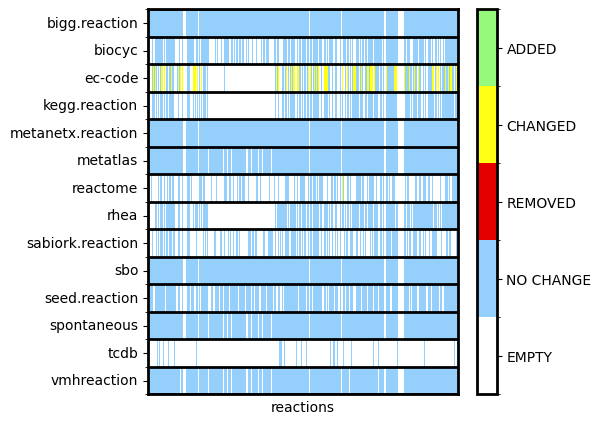

In [7]:
assert len(to_double_check[annotation_type]) == 0, f"There are still columns with data that need reconcilliation: {to_double_check[annotation_type]}"
df_annotations = model_annotation_dfs[annotation_type]

if compare:
    try:
        df_previous = pd.read_csv(
            f"{ROOT_PATH}{MODEL_PATH}/{annotation_type}.tsv", 
            sep="\t", 
            index_col=0,
            dtype=str,
        )
    except FileNotFoundError:
        df_previous = pd.DataFrame([], columns=[annotation_type])
    
    fig, ax = plt.subplots(1, 1, figsize=(5, 5))
    df_comparision = compare_tables(
        df_previous.set_index(annotation_type),
        df_annotations.set_index(annotation_type),
    )
    ax = visualize_comparison(df_comparision)


if overwrite:
    df_annotations.to_csv(f"{ROOT_PATH}{MODEL_PATH}/{annotation_type}.tsv",sep="\t")
else:
    df_annotations.to_csv(f"{ROOT_PATH}{INTERIM_PATH}/{annotation_type}.tsv", sep="\t")
df_annotations

### Metabolites

In [8]:
annotation_type = "metabolites"
databases = ["MetAtlas"]
df_annotations_all = pd.read_csv(
    f"{ROOT_PATH}{MODEL_PATH}/{annotation_type}.tsv", 
    sep="\t", 
    index_col=0,
    dtype=str,
)
df_annotations_all = df_annotations_all.set_index(annotation_type)
df_annotations_all = df_annotations_all.rename({c: f"{c}_MODEL" for c in df_annotations_all.columns}, axis=1)

for db_tag in databases:
    df = pd.read_csv(
        f"{annotation_dirpath}/{annotation_type}_{db_tag}.tsv", 
        sep="\t",
        index_col=0,
        dtype=str,
    ).set_index(annotation_type)
    df.columns = [f"{c}_{db_tag}" for c in df.columns]
    df_annotations_all = df_annotations_all.merge(
        df,
        left_index=True,
        right_index=True,
        how="left",
    )

# Keep database tags on duplicate columns for reconcilliation, remove for unique columns
unique_columns = set([name.rsplit("_", 1)[0] for name in df_annotations_all.columns])
to_double_check[annotation_type] = {
    unique: [
        name for name in df_annotations_all.columns
        if name.rsplit("_", 1)[0] == unique
    ] for unique in unique_columns
}
unique_mapping = {
    to_double_check[annotation_type].pop(unique).pop(): unique
    for unique, dbs in to_double_check[annotation_type].copy().items()
    if len(dbs) == 1
}
print(f"Annotation columns to reconcile: {to_double_check[annotation_type]}")
df_annotations_all

Annotation columns to reconcile: {'metatlas': ['metatlas_MODEL', 'metatlas_MetAtlas'], 'bigg.metabolite': ['bigg.metabolite_MODEL', 'bigg.metabolite_MetAtlas'], 'chebi': ['chebi_MODEL', 'chebi_MetAtlas'], 'hmdb': ['hmdb_MODEL', 'hmdb_MetAtlas'], 'pubchem.compound': ['pubchem.compound_MODEL', 'pubchem.compound_MetAtlas'], 'kegg.compound': ['kegg.compound_MODEL', 'kegg.compound_MetAtlas'], 'metanetx.chemical': ['metanetx.chemical_MODEL', 'metanetx.chemical_MetAtlas'], 'lipidmaps': ['lipidmaps_MODEL', 'lipidmaps_MetAtlas'], 'vmhmetabolite': ['vmhmetabolite_MODEL', 'vmhmetabolite_MetAtlas']}


,bigg.metabolite_MODEL,biocyc_MODEL,chebi_MODEL,envipath_MODEL,hmdb_MODEL,inchikey_MODEL,kegg.compound_MODEL,kegg.drug_MODEL,kegg.glycan_MODEL,lipidmaps_MODEL,...,vmhmetabolite_MODEL,metatlas_MetAtlas,bigg.metabolite_MetAtlas,kegg.compound_MetAtlas,hmdb_MetAtlas,chebi_MetAtlas,pubchem.compound_MetAtlas,lipidmaps_MetAtlas,vmhmetabolite_MetAtlas,metanetx.chemical_MetAtlas
metabolites,,,,,,,,,,,,,,,,,,,,,
13dpg_c,13dpg,META:DPG,CHEBI:16001,NaN,HMDB62758,LJQLQCAXBUHEAZ-UWTATZPHSA-J,C00236,NaN,NaN,NaN,...,13dpg,MAM00247c,13dpg,C00236,NaN,CHEBI:16001,439191,NaN,13dpg,MNXM261
23dpg_c,23dpg,META:23-DIPHOSPHOGLYCERATE,CHEBI:17720,NaN,HMDB01294,XOHUEYCVLUUEJJ-UWTATZPHSA-I,C01159,NaN,NaN,NaN,...,23dpg,MAM00569c,23dpg,C01159,NaN,CHEBI:17720,NaN,NaN,23dpg,MNXM146487;MNXM892
2kmb_c,2kmb,META:CPD-479,CHEBI:33574,NaN,HMDB01553;HMDB13210,SXFSQZDSUWACKX-UHFFFAOYSA-M,C01180,NaN,NaN,LMFA01060170,...,2kmb,MAM01016c,2kmb,C01180,NaN,CHEBI:33574,NaN,LMFA01060170,2kmb,MNXM276
2pg_c,2pg,META:2-PG,CHEBI:17835,NaN,HMDB00362;HMDB62707;HMDB03391,GXIURPTVHJPJLF-UWTATZPHSA-K,C00631,NaN,NaN,NaN,...,2pg,MAM00674c,2pg,C00631,NaN,CHEBI:17835,439278,NaN,2pg,MNXM275
35camp_c,camp,META:CAMP,CHEBI:17489,NaN,HMDB0000058,IVOMOUWHDPKRLL-KQYNXXCUSA-M,C00575,NaN,NaN,NaN,...,camp,MAM01419c,camp,C00575,HMDB0000058,CHEBI:17489,6076,NaN,camp,MNXM243
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
xmp_c,xmp,META:XANTHOSINE-5-PHOSPHATE,CHEBI:15652,NaN,HMDB01554;HMDB62755,DCTLYFZHFGENCW-UUOKFMHZSA-L,C00655,NaN,NaN,NaN,...,xmp,MAM03150c,xmp,C00655,NaN,CHEBI:15652,73323,NaN,xmp,MNXM298
xu5p__D_c,xu5p__D,META:XYLULOSE-5-PHOSPHATE,CHEBI:16332,NaN,HMDB06212;HMDB00868,FNZLKVNUWIIPSJ-RFZPGFLSSA-L,C00231,NaN,NaN,NaN,...,xu5p_D,MAM01761c,xu5p__D,C00231,NaN,CHEBI:16332,439190,NaN,xu5p_D,MNXM186
xylt_c,xylt,META:XYLITOL,CHEBI:1305691,NaN,HMDB0002917,HEBKCHPVOIAQTA-SCDXWVJYSA-N,C00379,D00061,NaN,NaN,...,xylt,MAM03155c,xylt,C00379,HMDB0002917,CHEBI:1305691,6912,NaN,xylt,MNXM510


#### Reconcile cross-referenced from multiple sources
These columns had multiple mappings and need to be reconciled.

In [9]:
reconcilliation = {
    # Overwrite with MetAtlas
    'kegg.compound': 'MetAtlas',
    'lipidmaps': 'MetAtlas',
    'hmdb':  'MetAtlas',
    'vmhmetabolite': 'MetAtlas',
    'metatlas': 'MetAtlas',
    'chebi': 'MetAtlas',
    'pubchem.compound': 'MetAtlas',
    'metanetx.chemical': 'MetAtlas',
    # Preserve from model, some BiGG mappings in MetAtlas are off.
    'bigg.metabolite':  'MODEL',

}

df_annotations = df_annotations_all.copy()
for key, chosen_col in reconcilliation.items():
    df_base_column = df_annotations_all.loc[:, f"{key}_{chosen_col}"].copy()
    df_base_column.name = key
    df_columns = df_annotations_all.loc[:, to_double_check[annotation_type][key]]
    for idx, row in df_columns.iterrows():
        # Preserve old ID to prevent loss of ID
        if not row.isna()[f"{key}_MODEL"] and row.isna()[f"{key}_{chosen_col}"]:
            df_base_column[idx] = row[f"{key}_MODEL"]
    
    df_annotations[key] = df_base_column
    df_annotations = df_annotations.drop(to_double_check[annotation_type][key], axis=1)
    to_double_check[annotation_type].pop(key)
    
# Overwrite 
df_annotations = df_annotations.rename(unique_mapping, axis=1)
df_annotations = df_annotations.reset_index(drop=False)
model_annotation_dfs[annotation_type] = df_annotations
df_annotations

,metabolites,biocyc,envipath,inchikey,kegg.drug,kegg.glycan,reactome,sabiork.compound,sbo,seed.compound,slm,kegg.compound,lipidmaps,hmdb,vmhmetabolite,metatlas,chebi,pubchem.compound,metanetx.chemical,bigg.metabolite
0,13dpg_c,META:DPG,NaN,LJQLQCAXBUHEAZ-UWTATZPHSA-J,NaN,NaN,29800,21215,SBO:0000247,cpd00203,NaN,C00236,NaN,HMDB62758,13dpg,MAM00247c,CHEBI:16001,439191,MNXM261,13dpg
1,23dpg_c,META:23-DIPHOSPHOGLYCERATE,NaN,XOHUEYCVLUUEJJ-UWTATZPHSA-I,NaN,NaN,6798337,20899;1355,SBO:0000247,cpd00853;cpd02119,NaN,C01159,NaN,HMDB01294,23dpg,MAM00569c,CHEBI:17720,NaN,MNXM146487;MNXM892,23dpg
2,2kmb_c,META:CPD-479,NaN,SXFSQZDSUWACKX-UHFFFAOYSA-M,NaN,NaN,1237122,5424,SBO:0000247,cpd00869,NaN,C01180,LMFA01060170,HMDB01553;HMDB13210,2kmb,MAM01016c,CHEBI:33574,NaN,MNXM276,2kmb
3,2pg_c,META:2-PG,NaN,GXIURPTVHJPJLF-UWTATZPHSA-K,NaN,NaN,30485,31,SBO:0000247,cpd00482,NaN,C00631,NaN,HMDB00362;HMDB62707;HMDB03391,2pg,MAM00674c,CHEBI:17835,439278,MNXM275,2pg
4,35camp_c,META:CAMP,NaN,IVOMOUWHDPKRLL-KQYNXXCUSA-M,NaN,NaN,30389,1379,SBO:0000247,cpd00446,NaN,C00575,NaN,HMDB0000058,camp,MAM01419c,CHEBI:17489,6076,MNXM243,camp
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,xmp_c,META:XANTHOSINE-5-PHOSPHATE,NaN,DCTLYFZHFGENCW-UUOKFMHZSA-L,NaN,NaN,111584,1686,SBO:0000247,cpd00497,NaN,C00655,NaN,HMDB01554;HMDB62755,xmp,MAM03150c,CHEBI:15652,73323,MNXM298,xmp
288,xu5p__D_c,META:XYLULOSE-5-PHOSPHATE,NaN,FNZLKVNUWIIPSJ-RFZPGFLSSA-L,NaN,NaN,29790,1317,SBO:0000247,cpd00198,NaN,C00231,NaN,HMDB06212;HMDB00868,xu5p_D,MAM01761c,CHEBI:16332,439190,MNXM186,xu5p__D
289,xylt_c,META:XYLITOL,NaN,HEBKCHPVOIAQTA-SCDXWVJYSA-N,D00061,NaN,5660033,2033,SBO:0000247,cpd00306,NaN,C00379,NaN,HMDB0002917,xylt,MAM03155c,CHEBI:1305691,6912,MNXM510,xylt
290,xylu__D_c,META:D-XYLULOSE,NaN,ZAQJHHRNXZUBTE-WUJLRWPWSA-N,NaN,NaN,5661281,1504,SBO:0000247,cpd00259,NaN,C00310,NaN,HMDB0001644,xylu_D,MAM01759c,CHEBI:17140,5289590,MNXM597,xylu__D


#### Save annotations

,metabolites,biocyc,envipath,inchikey,kegg.drug,kegg.glycan,reactome,sabiork.compound,sbo,seed.compound,slm,kegg.compound,lipidmaps,hmdb,vmhmetabolite,metatlas,chebi,pubchem.compound,metanetx.chemical,bigg.metabolite
0,13dpg_c,META:DPG,NaN,LJQLQCAXBUHEAZ-UWTATZPHSA-J,NaN,NaN,29800,21215,SBO:0000247,cpd00203,NaN,C00236,NaN,HMDB62758,13dpg,MAM00247c,CHEBI:16001,439191,MNXM261,13dpg
1,23dpg_c,META:23-DIPHOSPHOGLYCERATE,NaN,XOHUEYCVLUUEJJ-UWTATZPHSA-I,NaN,NaN,6798337,20899;1355,SBO:0000247,cpd00853;cpd02119,NaN,C01159,NaN,HMDB01294,23dpg,MAM00569c,CHEBI:17720,NaN,MNXM146487;MNXM892,23dpg
2,2kmb_c,META:CPD-479,NaN,SXFSQZDSUWACKX-UHFFFAOYSA-M,NaN,NaN,1237122,5424,SBO:0000247,cpd00869,NaN,C01180,LMFA01060170,HMDB01553;HMDB13210,2kmb,MAM01016c,CHEBI:33574,NaN,MNXM276,2kmb
3,2pg_c,META:2-PG,NaN,GXIURPTVHJPJLF-UWTATZPHSA-K,NaN,NaN,30485,31,SBO:0000247,cpd00482,NaN,C00631,NaN,HMDB00362;HMDB62707;HMDB03391,2pg,MAM00674c,CHEBI:17835,439278,MNXM275,2pg
4,35camp_c,META:CAMP,NaN,IVOMOUWHDPKRLL-KQYNXXCUSA-M,NaN,NaN,30389,1379,SBO:0000247,cpd00446,NaN,C00575,NaN,HMDB0000058,camp,MAM01419c,CHEBI:17489,6076,MNXM243,camp
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,xmp_c,META:XANTHOSINE-5-PHOSPHATE,NaN,DCTLYFZHFGENCW-UUOKFMHZSA-L,NaN,NaN,111584,1686,SBO:0000247,cpd00497,NaN,C00655,NaN,HMDB01554;HMDB62755,xmp,MAM03150c,CHEBI:15652,73323,MNXM298,xmp
288,xu5p__D_c,META:XYLULOSE-5-PHOSPHATE,NaN,FNZLKVNUWIIPSJ-RFZPGFLSSA-L,NaN,NaN,29790,1317,SBO:0000247,cpd00198,NaN,C00231,NaN,HMDB06212;HMDB00868,xu5p_D,MAM01761c,CHEBI:16332,439190,MNXM186,xu5p__D
289,xylt_c,META:XYLITOL,NaN,HEBKCHPVOIAQTA-SCDXWVJYSA-N,D00061,NaN,5660033,2033,SBO:0000247,cpd00306,NaN,C00379,NaN,HMDB0002917,xylt,MAM03155c,CHEBI:1305691,6912,MNXM510,xylt
290,xylu__D_c,META:D-XYLULOSE,NaN,ZAQJHHRNXZUBTE-WUJLRWPWSA-N,NaN,NaN,5661281,1504,SBO:0000247,cpd00259,NaN,C00310,NaN,HMDB0001644,xylu_D,MAM01759c,CHEBI:17140,5289590,MNXM597,xylu__D


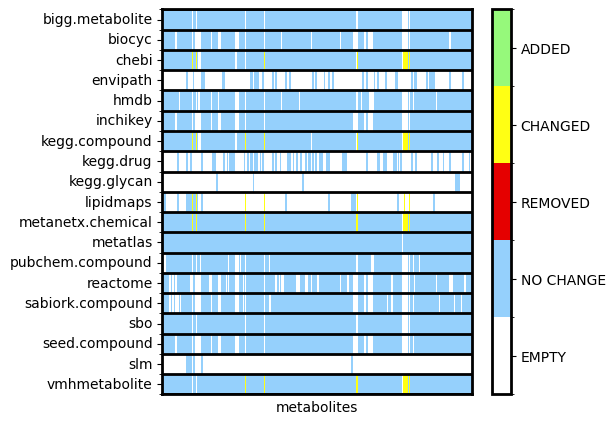

In [10]:
assert len(to_double_check[annotation_type]) == 0, f"There are still columns with data that need reconcilliation: {to_double_check[annotation_type]}"
df_annotations = model_annotation_dfs[annotation_type]

if compare:
    try:
        df_previous = pd.read_csv(
            f"{ROOT_PATH}{MODEL_PATH}/{annotation_type}.tsv", 
            sep="\t", 
            index_col=0,
            dtype=str,
        )
    except FileNotFoundError:
        df_previous = pd.DataFrame([], columns=[annotation_type])
    
    fig, ax = plt.subplots(1, 1, figsize=(5, 5))
    df_comparision = compare_tables(
        df_previous.set_index(annotation_type),
        df_annotations.set_index(annotation_type),
    )
    ax = visualize_comparison(df_comparision)


if overwrite:
    df_annotations.to_csv(f"{ROOT_PATH}{MODEL_PATH}/{annotation_type}.tsv",sep="\t")
else:
    df_annotations.to_csv(f"{ROOT_PATH}{INTERIM_PATH}/{annotation_type}.tsv", sep="\t")
df_annotations

### Genes

In [11]:
annotation_type = "genes"
databases = ["UniProt", "MIM", "MetAtlas"]
df_annotations_all = pd.read_csv(
    f"{ROOT_PATH}{MODEL_PATH}/{annotation_type}.tsv", 
    sep="\t", 
    index_col=0,
    dtype=str,
)
df_annotations_all = df_annotations_all.set_index(annotation_type)
df_annotations_all = df_annotations_all.rename({c: f"{c}_MODEL" for c in df_annotations_all.columns}, axis=1)

for db_tag in databases:
    df = pd.read_csv(
        f"{annotation_dirpath}/{annotation_type}_{db_tag}.tsv", 
        sep="\t",
        index_col=0,
        dtype=str,
    ).set_index(annotation_type)
    df.columns = [f"{c}_{db_tag}" for c in df.columns]
    df_annotations_all = df_annotations_all.merge(
        df,
        left_index=True,
        right_index=True,
        how="left",
    )

# Keep database tags on duplicate columns for reconcilliation, remove for unique columns
unique_columns = set([name.rsplit("_", 1)[0] for name in df_annotations_all.columns])
to_double_check[annotation_type] = {
    unique: [
        name for name in df_annotations_all.columns
        if name.rsplit("_", 1)[0] == unique
    ] for unique in unique_columns
}
unique_mapping = {
    to_double_check[annotation_type].pop(unique).pop(): unique
    for unique, dbs in to_double_check[annotation_type].copy().items()
    if len(dbs) == 1
}
print(f"Annotation columns to reconcile: {to_double_check[annotation_type]}")
df_annotations_all

Annotation columns to reconcile: {'ncbigene': ['ncbigene_MODEL', 'ncbigene_UniProt', 'ncbigene_MIM', 'ncbigene_MetAtlas'], 'ensembl': ['ensembl_MODEL', 'ensembl_MIM', 'ensembl_MetAtlas'], 'ccds': ['ccds_MODEL', 'ccds_UniProt'], 'refseq': ['refseq_MODEL', 'refseq_UniProt'], 'drugbank': ['drugbank_MODEL', 'drugbank_UniProt'], 'mim': ['mim_MODEL', 'mim_UniProt', 'mim_MIM'], 'uniprot': ['uniprot_MODEL', 'uniprot_UniProt', 'uniprot_MetAtlas'], 'mgi': ['mgi_MODEL', 'mgi_MIM'], 'hgnc.symbol': ['hgnc.symbol_MODEL', 'hgnc.symbol_UniProt', 'hgnc.symbol_MIM', 'hgnc.symbol_MetAtlas'], 'uniprot.isoform': ['uniprot.isoform_MODEL', 'uniprot.isoform_UniProt']}


,ccds_MODEL,drugbank_MODEL,ensembl_MODEL,hgnc.symbol_MODEL,hprd_MODEL,mgi_MODEL,mim_MODEL,ncbigene_MODEL,ncbigi_MODEL,refseq_MODEL,...,dbsnp_UniProt,mim_MIM,ncbigene_MIM,hgnc.symbol_MIM,ensembl_MIM,mgi_MIM,ensembl_MetAtlas,uniprot_MetAtlas,hgnc.symbol_MetAtlas,ncbigene_MetAtlas
genes,,,,,,,,,,,,,,,,,,,,,
ABCC4,CCDS9474.1,DB00718;DB00770;DB01076;DB00171;DB01327;DB0048...,ENSG00000125257,ABCC4,NaN,MGI:2443111,605250,10257,NaN,NP_005836.2,...,rs11568681,605250,10257,ABCC4,ENSG00000125257,MGI:2443111,ENSG00000125257,O15439,ABCC4,10257
ABCG2,CCDS3628.1,DB12001;DB08916;DB11363;DB00437;DB12015;DB0349...,ENSG00000118777,ABCG2,NaN,MGI:1347061;MGI:1351624,138900;603756;614490,9429,NaN,NP_004818.2;XP_011530722.1,...,rs2231137,138900;603756;614490,9429,ABCG2,ENSG00000118777,MGI:1347061;MGI:1351624,ENSG00000118777,Q9UNQ0,ABCG2,9429
ACP1,CCDS1639.1,DB04214;DB00173,NaN,ACP1,NaN,MGI:87881,171500,52,NaN,NP_004291.1,...,rs11691572,171500,52,ACP1,ENSG00000143727,MGI:87881,NaN,NaN,NaN,NaN
ACSL1,CCDS3839.1,DB00131;DB00171,ENSG00000151726,ACSL1,NaN,MGI:102797,152425,2180,NaN,NP_001273637.1;NP_001986.2;XP_016863376.1,...,NaN,152425,2180,ACSL1,ENSG00000151726,MGI:102797,ENSG00000151726,P33121,ACSL1,2180
ADA,CCDS13335.1,DB07711;DB07783;DB07786;DB04218;DB07785;DB0301...,ENSG00000196839,ADA,NaN,MGI:87916,102700;608958,100,NaN,NP_000013.2,...,rs73598374,102700;608958,100,ADA,ENSG00000196839,MGI:87916,ENSG00000196839,P00813,ADA,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
UMPS,CCDS3029.1,DB02890;DB00544,ENSG00000114491,UMPS,02022,MGI:1298388,258900;613891,7372,NaN,NP_000364.1,...,rs17843776,258900;613891,7372,UMPS,ENSG00000114491,MGI:1298388,ENSG00000114491,P11172,UMPS,7372
UROD,CCDS518.1,DB03727;DB04461,ENSG00000126088,UROD,NaN,MGI:98916,176100;613521,7389,NaN,NP_000365.3,...,rs11541959,176100;613521,7389,UROD,ENSG00000126088,MGI:98916,ENSG00000126088,P06132,UROD,7389
UROS,CCDS7648.1,NaN,ENSG00000188690,UROS,NaN,MGI:98917,263700;606938,7390,NaN,NP_000366.1,...,rs773301339,263700;606938,7390,UROS,ENSG00000188690,MGI:98917,ENSG00000188690,P10746,UROS,7390


#### Reconcile cross-referenced from multiple sources
These columns had multiple mappings and need to be reconciled.

In [12]:
reconcilliation = {
    # Overwrite with UniProt
    'uniprot': 'UniProt',
    'uniprot.isoform': 'UniProt',
    'refseq': 'UniProt',
    'ncbigene': 'UniProt',
    'hgnc.symbol': 'UniProt',
    'drugbank': 'UniProt',
    'ccds': 'UniProt',
    # Overwrite with MetAtlas
    'ensembl': 'MetAtlas',
    # Overwrite with MIM
    'mgi': 'MIM',
    'mim': 'MIM',
}

df_annotations = df_annotations_all.copy()
for key, chosen_col in reconcilliation.items():
    df_base_column = df_annotations_all.loc[:, f"{key}_{chosen_col}"].copy()
    df_base_column.name = key
    df_columns = df_annotations_all.loc[:, to_double_check[annotation_type][key]]
    for idx, row in df_columns.iterrows():
        # Preserve old ID to prevent loss of ID
        if not row.isna()[f"{key}_MODEL"] and row.isna()[f"{key}_{chosen_col}"]:
            df_base_column[idx] = row[f"{key}_MODEL"]
    
    df_annotations[key] = df_base_column
    df_annotations = df_annotations.drop(to_double_check[annotation_type][key], axis=1)
    to_double_check[annotation_type].pop(key)
    
# Overwrite 
df_annotations = df_annotations.rename(unique_mapping, axis=1)
df_annotations = df_annotations.reset_index(drop=False)
model_annotation_dfs[annotation_type] = df_annotations
df_annotations

,genes,hprd,ncbigi,sbo,uniprot.chain,dbsnp,uniprot,uniprot.isoform,refseq,ncbigene,hgnc.symbol,drugbank,ccds,ensembl,mgi,mim
0,ABCC4,NaN,NaN,SBO:0000243,PRO_0000093362,rs11568681,O15439,O15439-1,NP_001098985.1;NP_001288758.1;NP_001288759.1;N...,10257,ABCC4,DB00718;DB00770;DB01076;DB00171;DB01327;DB0048...,CCDS45061.1;CCDS76643.1;CCDS86356.1;CCDS9474.1,ENSG00000125257,MGI:2443111,605250
1,ABCG2,NaN,NaN,SBO:0000243,PRO_0000093386,rs2231137,Q9UNQ0,Q9UNQ0-1,NP_001244315.1;NP_004818.2;XP_005263412.1;XP_0...,9429,ABCG2,DB12001;DB08916;DB11363;DB00437;DB12015;DB0349...,CCDS3628.1;CCDS58910.1,ENSG00000118777,MGI:1347061;MGI:1351624,138900;603756;614490
2,ACP1,NaN,NaN,SBO:0000243,PRO_0000046558,rs11691572,P24666,P24666-1,NP_004291.1;NP_009030.1,52,ACP1,DB04214;DB00173,CCDS1639.1;CCDS1640.1;CCDS46217.1,NaN,MGI:87881,171500
3,ACSL1,NaN,NaN,SBO:0000243,PRO_0000193104,NaN,P33121,P33121-1,NP_001273637.1;NP_001273639.1;NP_001273640.1;N...,2180,ACSL1,DB00131;DB00171,CCDS3839.1;CCDS68826.1,ENSG00000151726,MGI:102797,152425
4,ADA,NaN,NaN,SBO:0000243,PRO_0000194352,rs73598374,P00813,P00813-1,NP_000013.2,100,ADA,DB07711;DB07783;DB07786;DB04218;DB07785;DB0301...,CCDS13335.1,ENSG00000196839,MGI:87916,102700;608958
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278,UMPS,02022,NaN,SBO:0000243,PRO_0000139649,rs17843776,P11172,P11172-1,NP_000364.1,7372,UMPS,DB02890;DB00544,CCDS3029.1,ENSG00000114491,MGI:1298388,258900;613891
279,UROD,NaN,NaN,SBO:0000243,PRO_0000187569,rs11541959,P06132,P06132-1,NP_000365.3,7389,UROD,DB03727;DB04461,CCDS518.1,ENSG00000126088,MGI:98916,176100;613521
280,UROS,NaN,NaN,SBO:0000243,PRO_0000135251,rs773301339,P10746,P10746-1,NP_000366.1,7390,UROS,NaN,CCDS7648.1,ENSG00000188690,MGI:98917,263700;606938
281,XYLB,06812,NaN,SBO:0000243,PRO_0000230985,rs17118,O75191,O75191-1,NP_005099.2,9942,XYLB,NaN,CCDS2678.1,ENSG00000093217,MGI:2142985,604049


#### Save annotations

,genes,hprd,ncbigi,sbo,uniprot.chain,dbsnp,uniprot,uniprot.isoform,refseq,ncbigene,hgnc.symbol,drugbank,ccds,ensembl,mgi,mim
0,ABCC4,NaN,NaN,SBO:0000243,PRO_0000093362,rs11568681,O15439,O15439-1,NP_001098985.1;NP_001288758.1;NP_001288759.1;N...,10257,ABCC4,DB00718;DB00770;DB01076;DB00171;DB01327;DB0048...,CCDS45061.1;CCDS76643.1;CCDS86356.1;CCDS9474.1,ENSG00000125257,MGI:2443111,605250
1,ABCG2,NaN,NaN,SBO:0000243,PRO_0000093386,rs2231137,Q9UNQ0,Q9UNQ0-1,NP_001244315.1;NP_004818.2;XP_005263412.1;XP_0...,9429,ABCG2,DB12001;DB08916;DB11363;DB00437;DB12015;DB0349...,CCDS3628.1;CCDS58910.1,ENSG00000118777,MGI:1347061;MGI:1351624,138900;603756;614490
2,ACP1,NaN,NaN,SBO:0000243,PRO_0000046558,rs11691572,P24666,P24666-1,NP_004291.1;NP_009030.1,52,ACP1,DB04214;DB00173,CCDS1639.1;CCDS1640.1;CCDS46217.1,NaN,MGI:87881,171500
3,ACSL1,NaN,NaN,SBO:0000243,PRO_0000193104,NaN,P33121,P33121-1,NP_001273637.1;NP_001273639.1;NP_001273640.1;N...,2180,ACSL1,DB00131;DB00171,CCDS3839.1;CCDS68826.1,ENSG00000151726,MGI:102797,152425
4,ADA,NaN,NaN,SBO:0000243,PRO_0000194352,rs73598374,P00813,P00813-1,NP_000013.2,100,ADA,DB07711;DB07783;DB07786;DB04218;DB07785;DB0301...,CCDS13335.1,ENSG00000196839,MGI:87916,102700;608958
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278,UMPS,02022,NaN,SBO:0000243,PRO_0000139649,rs17843776,P11172,P11172-1,NP_000364.1,7372,UMPS,DB02890;DB00544,CCDS3029.1,ENSG00000114491,MGI:1298388,258900;613891
279,UROD,NaN,NaN,SBO:0000243,PRO_0000187569,rs11541959,P06132,P06132-1,NP_000365.3,7389,UROD,DB03727;DB04461,CCDS518.1,ENSG00000126088,MGI:98916,176100;613521
280,UROS,NaN,NaN,SBO:0000243,PRO_0000135251,rs773301339,P10746,P10746-1,NP_000366.1,7390,UROS,NaN,CCDS7648.1,ENSG00000188690,MGI:98917,263700;606938
281,XYLB,06812,NaN,SBO:0000243,PRO_0000230985,rs17118,O75191,O75191-1,NP_005099.2,9942,XYLB,NaN,CCDS2678.1,ENSG00000093217,MGI:2142985,604049


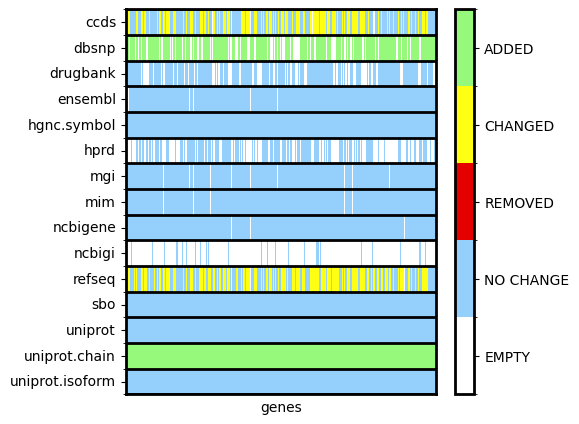

In [13]:
assert len(to_double_check[annotation_type]) == 0, f"There are still columns with data that need reconcilliation: {to_double_check[annotation_type]}"
df_annotations = model_annotation_dfs[annotation_type]

if compare:
    try:
        df_previous = pd.read_csv(
            f"{ROOT_PATH}{MODEL_PATH}/{annotation_type}.tsv", 
            sep="\t", 
            index_col=0,
            dtype=str,
        )
    except FileNotFoundError:
        df_previous = pd.DataFrame([], columns=[annotation_type])
    
    fig, ax = plt.subplots(1, 1, figsize=(5, 5))
    df_comparision = compare_tables(
        df_previous.set_index(annotation_type),
        df_annotations.set_index(annotation_type),
    )
    ax = visualize_comparison(df_comparision)


if overwrite:
    df_annotations.to_csv(f"{ROOT_PATH}{MODEL_PATH}/{annotation_type}.tsv",sep="\t")
else:
    df_annotations.to_csv(f"{ROOT_PATH}{INTERIM_PATH}/{annotation_type}.tsv", sep="\t")
df_annotations